In [1]:
import numpy as np
import pandas as pd
import scipy

#These are the visualization libraries. Matplotlib is standard and is what most people use.
#Seaborn works on top of matplotlib, as we mentioned in the course.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler

#Sk learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data, contained in the segmentation data csv file.
df= pd.read_csv('segmentation data.csv', index_col = 0)

In [3]:
# Descriptive analysis of the data set. 
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


Visualizations

<Axes: xlabel='Age', ylabel='Income'>

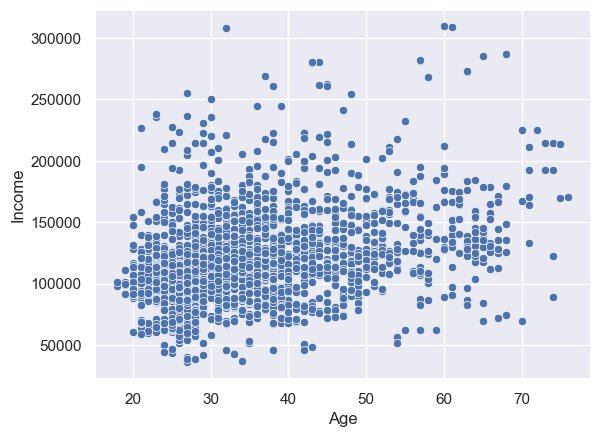

In [6]:
# Scatter plot: Age vs. Income
sns.scatterplot(x='Age', y='Income', data=df)

<Axes: xlabel='Marital status', ylabel='count'>

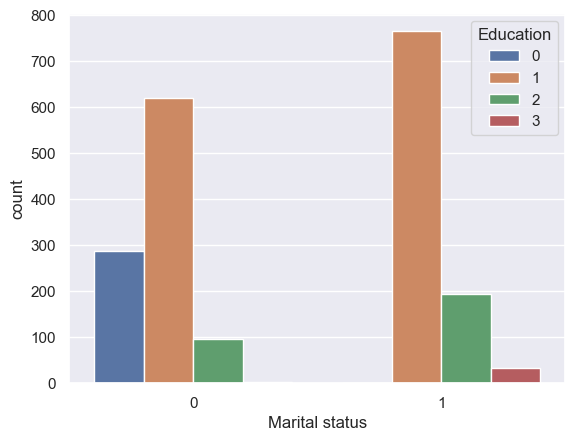

In [7]:
# Bar plot: Marital status vs. Education
sns.countplot(x='Marital status', hue='Education', data=df)

<Axes: xlabel='Age', ylabel='Count'>

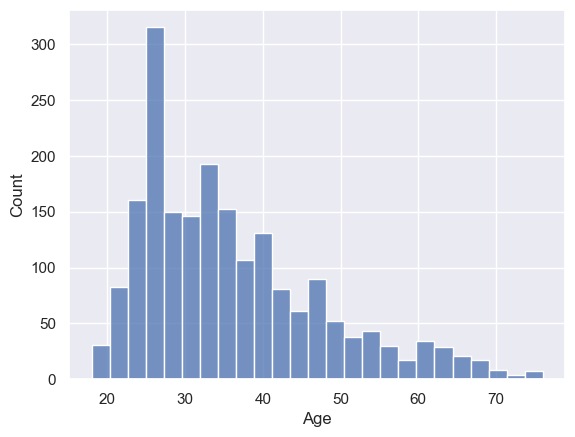

In [8]:
# Histogram: Age
sns.histplot(df['Age'])

<Axes: ylabel='Income'>

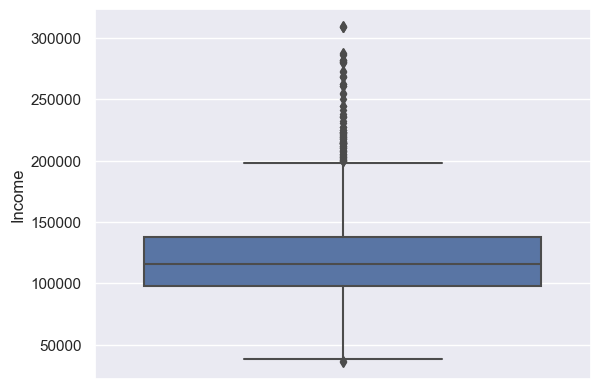

In [9]:
# Box plot: Income
sns.boxplot(y='Income', data=df)

<Axes: xlabel='Occupation', ylabel='count'>

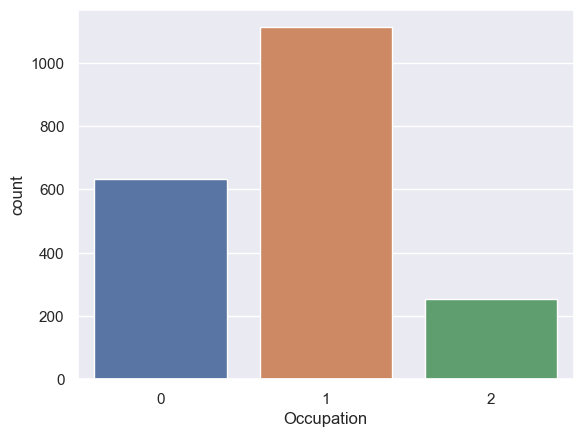

In [10]:
# Bar plot: Occupation
sns.countplot(x='Occupation', data=df)

In [11]:
# Pearson correlation coefficient 

df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


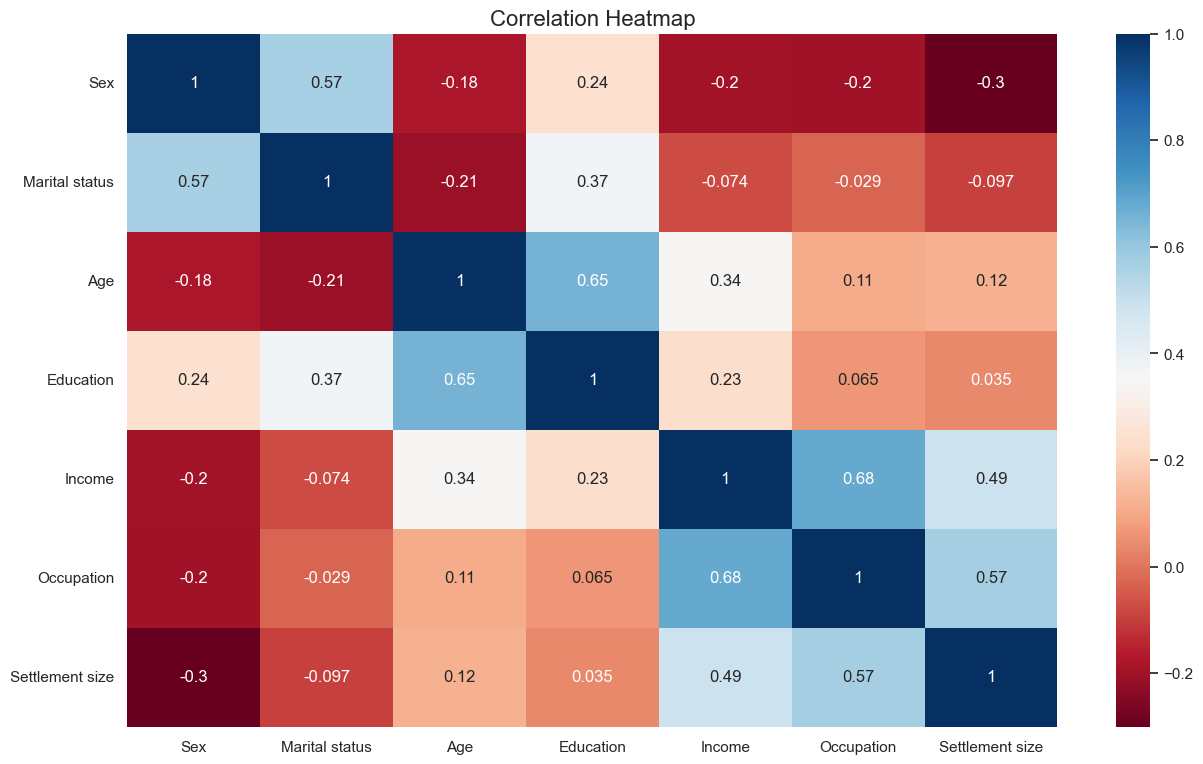

In [12]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=16)
plt.yticks(rotation =0)
plt.show()

Text(0.5, 1.0, 'Visualization of raw data')

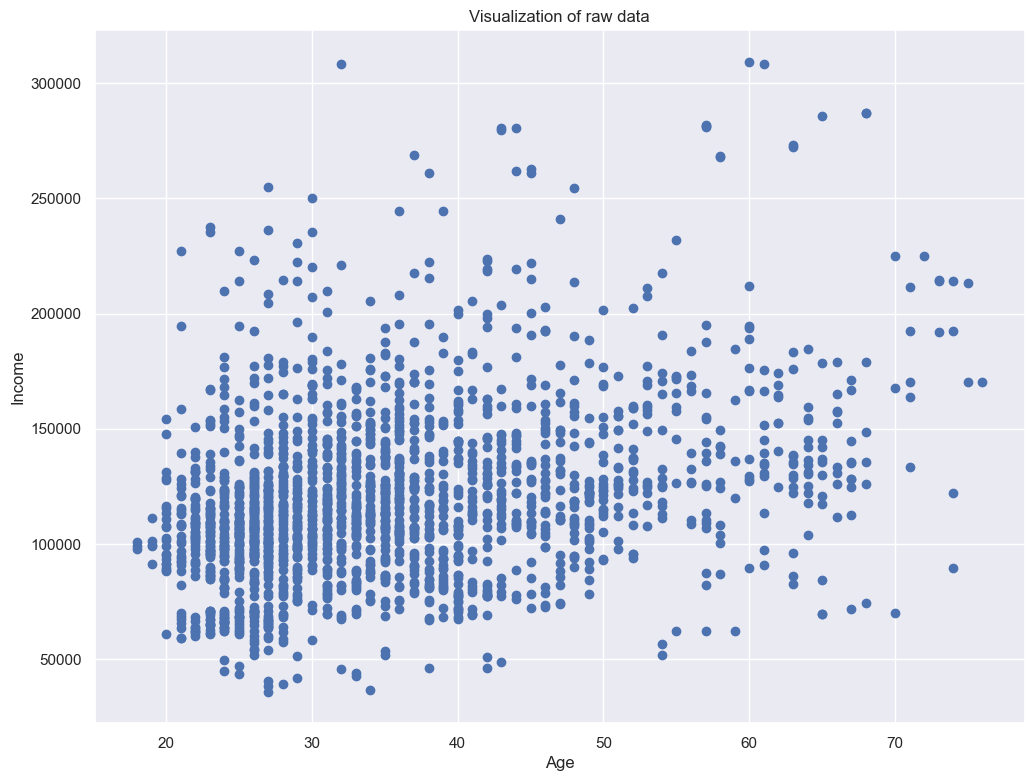

In [13]:
# We have 2000 data points, which we'll scatter acrros Age and Income, located on positions 2 and 4 in our data set. 
plt.figure(figsize = (12, 9))
plt.scatter(df.iloc[:, 2], df.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

Dimension Reduction using Principal Component Analysis

In [14]:
import numpy as np
import pandas as pd
import scipy

#These are the visualization libraries. Matplotlib is standard.
#Seaborn works on top of matplotlib.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler

#Sk learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [15]:
# Load the data, contained in the segmentation data csv file.
df= pd.read_csv('segmentation data.csv', index_col = 0)

In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [17]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

In [18]:
# Fit PCA with our standardized data.
pca.fit(df_scaled)

PCA()

In [20]:
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(df_scaled)

PCA()

In [21]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

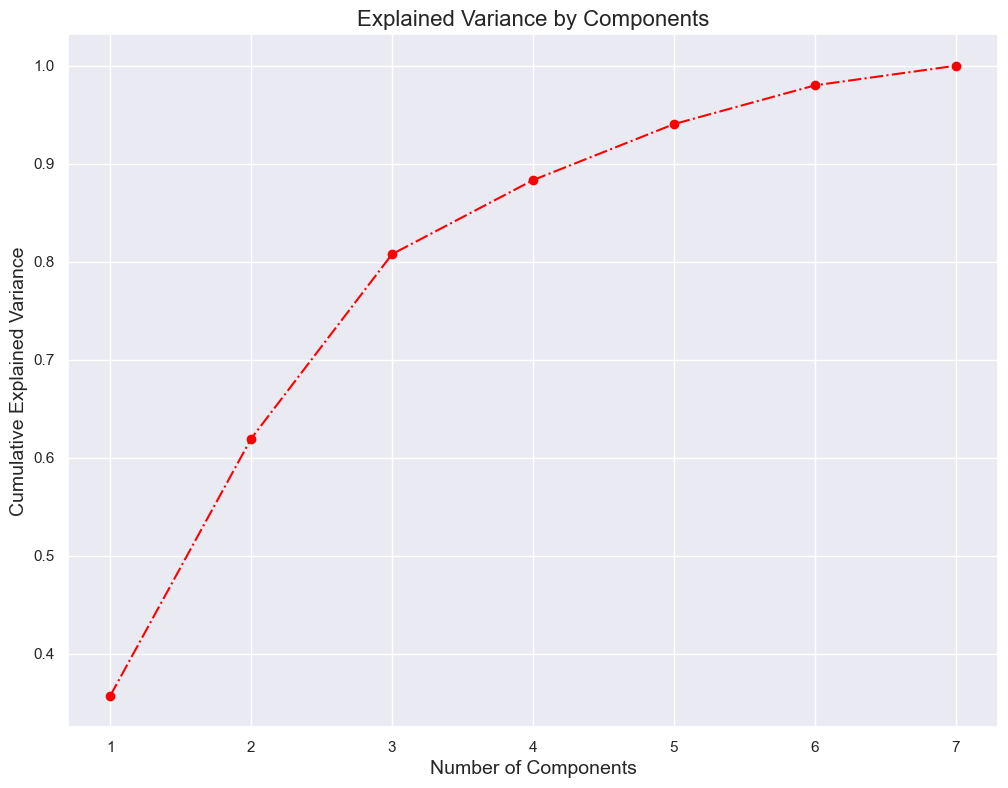

In [22]:
plt.figure(figsize=(12, 9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '-.',color='red')
plt.title('Explained Variance by Components', fontsize=16)
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.show()

In [23]:
# We choose three components. 3 or 4 seems the right choice according to the previous graph.
pca = PCA(n_components = 3)

In [24]:
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(df_scaled)

PCA(n_components=3)

In [25]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [26]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


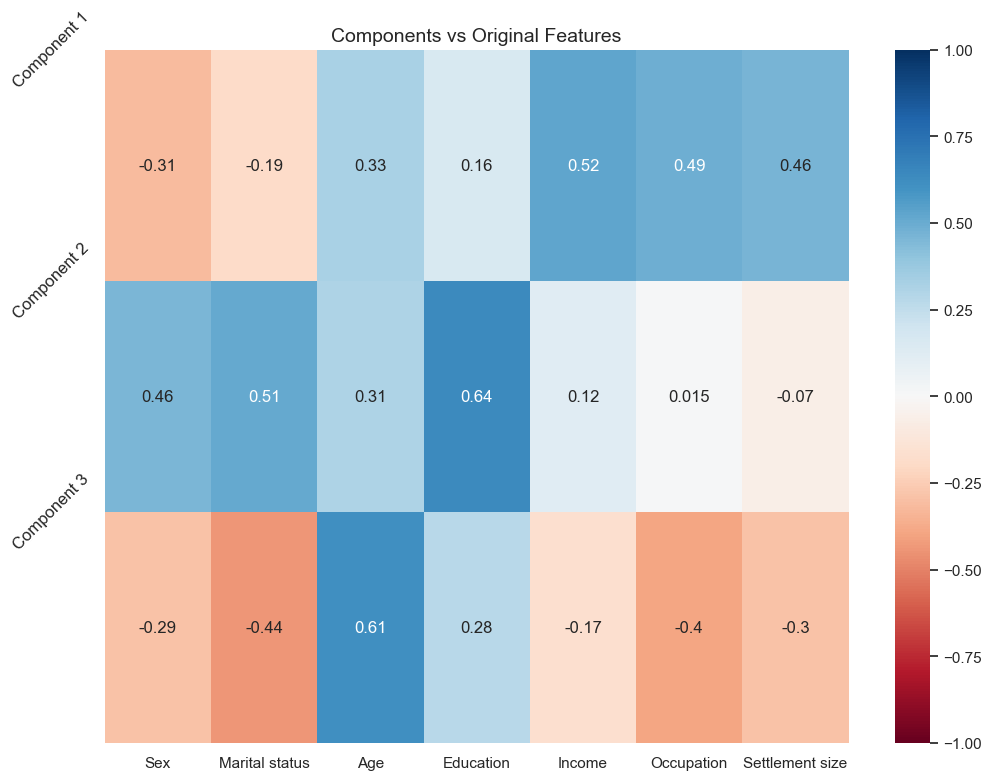

In [27]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

In [28]:
pca.transform(df_scaled)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [30]:
pca.transform(df_scaled)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

k means clustering 

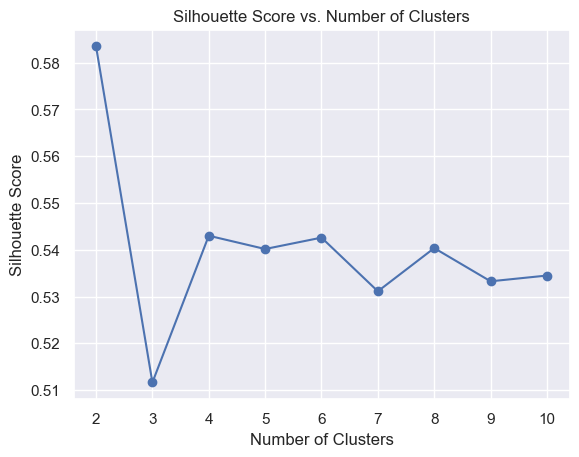

In [31]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Selecting relevant columns for clustering
columns_for_clustering = ['Age', 'Income']

# Creating feature matrix
X = df[columns_for_clustering]

# Determining the optimal number of clusters using silhouette score
silhouette_scores = []
cluster_range = range(2, 11)  # Test cluster sizes from 2 to 10
for n_clusters in cluster_range:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting silhouette scores vs. number of clusters
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [33]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

Performing K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations. In addition we run the algortihm at many different starting points - k means plus plus. And we set a random state for reproducibility.

Plot the Within Cluster Sum of Squares for the different number of clusters. From this plot we choose the number of clusters. We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.

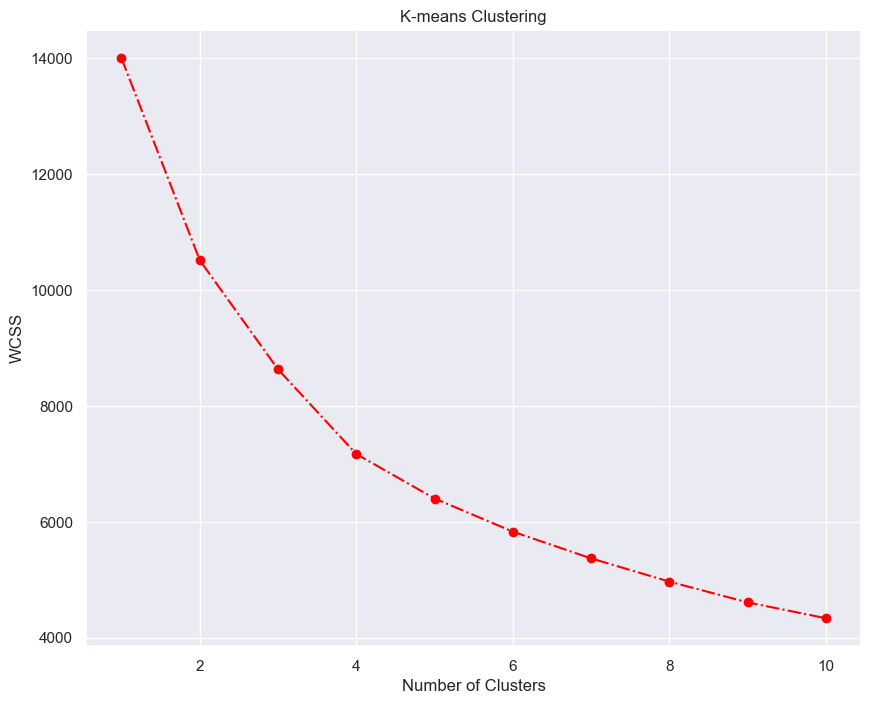

In [34]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [35]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [37]:
# We divide our data into the four clusters.
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

We create a new data frame with the original features and add a new column with the assigned clusters for each point.

In [39]:
df_segm_kmeans= df_scaled.copy()
df_segm_kmeans = pd.DataFrame(data = df_scaled,columns = df.columns)
df_segm_kmeans['Segment K-means'] = kmeans.labels_
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,3
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,0
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,2
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,1
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,1


In [40]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
1,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888
2,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
3,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039


In [41]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
well-off,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
fewer-opportunities,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888
standard,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
career focused,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039


In [42]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  3:'career focused'})
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Labels
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,3,career focused
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,0,well-off
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,2,standard
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,1,fewer opportunities
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,1,fewer opportunities


In [43]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

<Figure size 1000x800 with 0 Axes>

Random Forest Classification

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data into features (X) and target variable (y)
X = df_segm_kmeans.drop(['Segment K-means', 'Labels'], axis=1)  # Features
y = df_segm_kmeans['Labels']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.9925
Confusion Matrix:
[[ 40   0   0   0]
 [  0 106   2   0]
 [  0   0  96   0]
 [  1   0   0 155]]
Classification Report:
                     precision    recall  f1-score   support

     career focused       0.98      1.00      0.99        40
fewer opportunities       1.00      0.98      0.99       108
           standard       0.98      1.00      0.99        96
           well-off       1.00      0.99      1.00       156

           accuracy                           0.99       400
          macro avg       0.99      0.99      0.99       400
       weighted avg       0.99      0.99      0.99       400



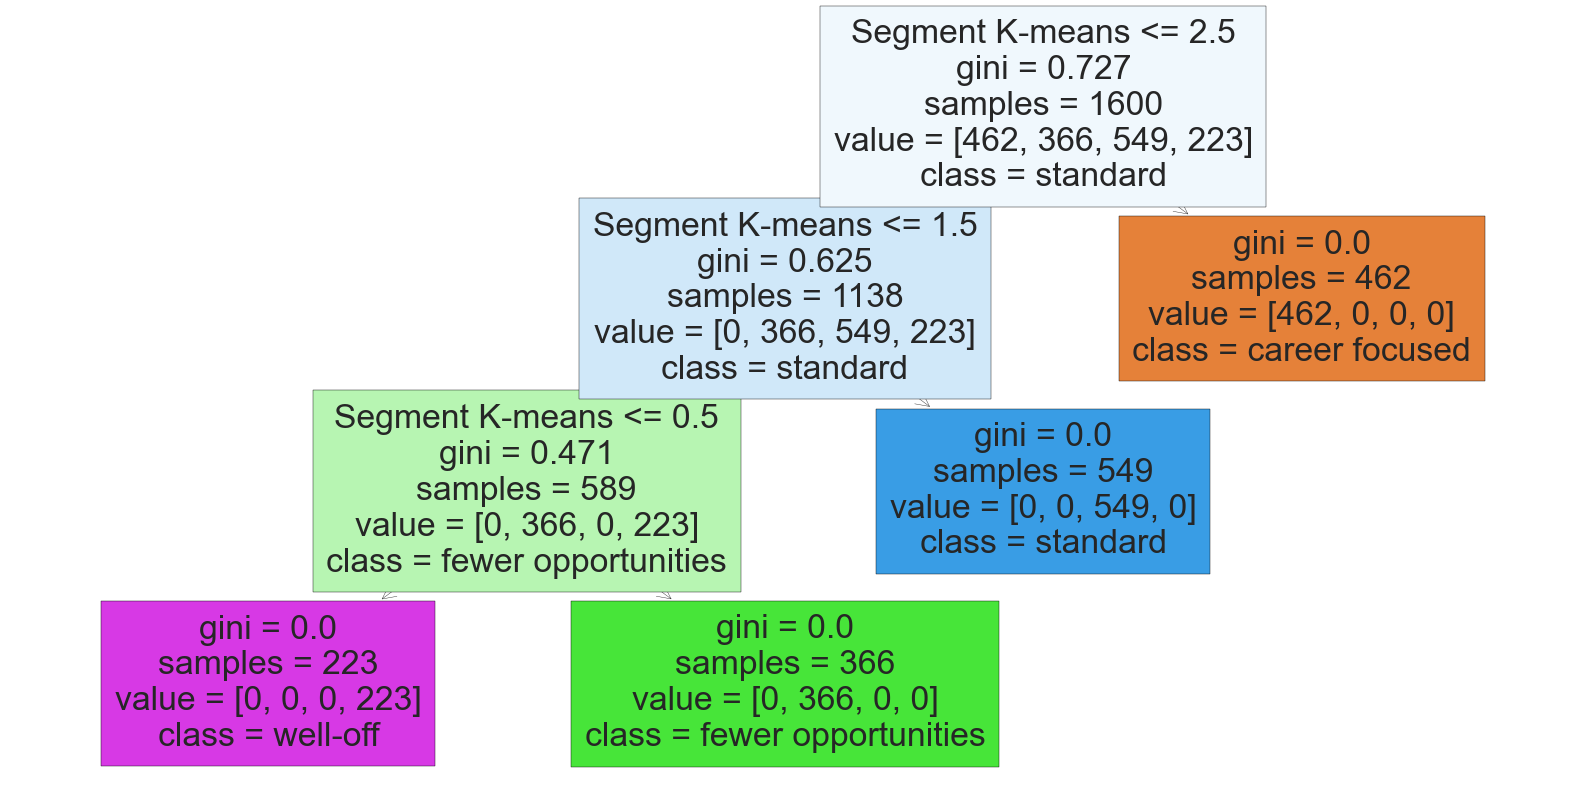

In [67]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split data into features (X) and target variable (y)
X = df_segm_kmeans.drop(['Segment K-means', 'Labels'], axis=1)  # Features
y = df_segm_kmeans['Labels']  # Target variable

# Assuming X contains the features and y contains the labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate SVM model with a chosen kernel (e.g., linear kernel)
svm_model = SVC(kernel='linear')

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9875
